# Ransomware detection

https://www.kaggle.com/datasets/mexwell/ransomware-dataset-2024

About Dataset
The dataset we have created is focused on malware analysis and consists of 26 different malware families, categorized into four main categories. It includes both malicious and benign samples, providing a balanced total of 21,752 samples, with 10,876 malicious and 10,876 benign files.

Este dataset contiene 21,752 muestras balanceadas, de las cuales 10,876 son maliciosas y 10,876 benignas. Las muestras maliciosas están distribuidas en 26 familias distintas, incluyendo un enfoque particular en ransomware, con familias reconocidas como Cerber, DarkSide, GandCrab, Ryuk y WannaCry, entre otras.

El objetivo principal es entrenar modelos de clasificación capaces de distinguir entre archivos maliciosos y benignos, evaluando su desempeño mediante métricas como precisión, recall, f1-score y exactitud.

El dataset contiene características relevantes de cada archivo, que serán procesadas, limpiadas y transformadas para generar los conjuntos de entrenamiento y prueba. La variable objetivo es Class, que indica si un archivo es malicioso (1) o benigno (0).

PLANNING:
- INTRO - short dataset description.
- EDA - shape, dtypes, missing, class balance, sample rows, correlations.
- PREPARING DATA - drop useless columns, fix dtype issues, parse timestamps, coerce numerics, encode label.
- DATA SPLITTING - splitting training and testing data.
- RESULTS - early results.
- PREPARING MODELS - prepare hyperparameter, baseline models.
- RESULTS WITH MULTIPLES MODELS- metrics (precision/recall/f1), confusion matrix.
- BALANCING - try balancing and compare.
- RESULTS (after balancing) - compare metrics.
- CONCLUSION - state best model, tradeoffs, next steps.

# EDA

## Importamos las librerías necesarias y cargamos el dataset

In [ ]:
import pandas as pd
from pathlib import Path

base_dir = Path.cwd()
csv_file_path = base_dir.parent.parent / "data" / "raw_data" / "ransom.csv"
data = pd.read_csv(csv_file_path, low_memory=False, index_col=0)
# Para hacer más rápido el procesamiento, tomamos una muestra del dataset
df = data.sample(n=1000, random_state=42)
df.head(1)

,sha1,file_extension,EntryPoint,PEType,MachineType,magic_number,bytes_on_last_page,pages_in_file,relocations,size_of_header,...,total_procsses,files_malicious,files_suspicious,files_text,files_unknown,dlls_calls,apis,Class,Category,Family
md5,,,,,,,,,,,,,,,,,,,,,
8742c015240d3807cda31988658f2b80,7e89a31bbcbc780f3e2adc777995501f86079d6e,exe,0x34a4,PE32,"Intel 386 or later, and compatibles",MZ,0x0090,0x0003,0x0004,0x0000,...,36.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign,Benign,Benign


## Realizamos un analisis exploratorio sobre los datos

### Exploramos la forma general del dataset

In [ ]:
# Realizamos un analysis exploratorio sobre los datos
print("Shape:", df.shape)
print("\nColumns and dtypes:")
print(df.dtypes)
print("\nNumeric summary (describe):")
display(df.describe().T)

Shape: (1000, 76)

Columns and dtypes:
sha1               object
file_extension     object
EntryPoint         object
PEType             object
MachineType        object
                   ...   
dlls_calls        float64
apis              float64
Class              object
Category           object
Family             object
Length: 76, dtype: object

Numeric summary (describe):


,count,mean,std,min,25%,50%,75%,max
registry_read,1000.0,1969.901,12792.143237,0.0,23.00,213.5,898.25,359646.0
registry_write,1000.0,15.826,84.838194,0.0,0.00,0.0,3.00,1448.0
registry_delete,1000.0,1.908,18.058284,0.0,0.00,0.0,0.00,298.0
registry_total,1000.0,2063.848,13027.855054,0.0,22.75,221.0,918.75,365999.0
network_threats,1000.0,0.000,0.000000,0.0,0.00,0.0,0.00,0.0
network_dns,1000.0,4.134,27.120538,0.0,0.00,0.0,1.00,568.0
network_http,1000.0,1.675,13.845543,0.0,0.00,0.0,0.00,318.0
network_connections,1000.0,21.927,174.432217,0.0,0.00,2.0,5.00,2192.0
processes_malicious,1000.0,1.835,10.217151,0.0,0.00,1.0,2.00,314.0
processes_suspicious,1000.0,0.359,2.548846,0.0,0.00,0.0,0.00,70.0


### Verificamos valores nulos

In [ ]:
# Resumen de valores nulos

missing_counts = df.isna().sum()
missing_percent = 100 * missing_counts / len(df)
missing_summary = pd.concat([missing_counts, missing_percent], axis=1)
missing_summary.columns = ["nulos", "porcentaje"]
print("\nNulos por columna (n y %):")
display(missing_summary.sort_values("nulos", ascending=False).head(20))


Nulos por columna (n y %):


,nulos,porcentaje
sha1,0,0.0
file_extension,0,0.0
EntryPoint,0,0.0
PEType,0,0.0
MachineType,0,0.0
magic_number,0,0.0
bytes_on_last_page,0,0.0
pages_in_file,0,0.0
relocations,0,0.0
size_of_header,0,0.0


Revisamos su distribution

Counts:
Class
Malware    504
Benign     496
Name: count, dtype: int64

Percent:
Class
Malware    50.4
Benign     49.6
Name: count, dtype: float64


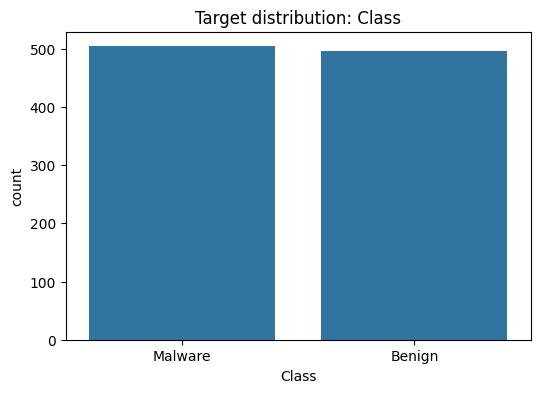

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

target_col = "Class"
figsize = (6, 4)

# Muestra los conteos y porcentajes para la variable binaria objetivo

vc = df[target_col].value_counts(dropna=False)
pct = (vc / len(df) * 100).round(2)
print("Counts:")
print(vc)
print("\nPercent:")
print(pct)

plt.figure(figsize=figsize)
sns.barplot(x=vc.index.astype(str), y=vc.values)
plt.title(f"Target distribution: {target_col}")
plt.ylabel("count")
plt.xlabel(target_col)
plt.show()

# PREPARING DATA

In [ ]:
# Hacemos una copia del DataFrame original para no modificar el raw
df_clean = df.copy()

# Eliminamos filas con valores nulos
df_clean = df_clean.dropna()

# Verificamos que no queden valores únicos
df_clean.nunique().sort_values()

# Quitamos espacios en los nombres de las columnas
df_clean.columns = df_clean.columns.str.strip()

# Analizamos el tipo de columnas en busca de columnas que no sean numéricas o apropiadas para el análisis
df_clean.keys()

Index(['sha1', 'file_extension', 'EntryPoint', 'PEType', 'MachineType',
       'magic_number', 'bytes_on_last_page', 'pages_in_file', 'relocations',
       'size_of_header', 'min_extra_paragraphs', 'max_extra_paragraphs',
       'init_ss_value', 'init_sp_value', 'init_ip_value', 'init_cs_value',
       'over_lay_number', 'oem_identifier', 'address_of_ne_header', 'Magic',
       'SizeOfCode', 'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'BaseOfData', 'ImageBase',
       'SectionAlignment', 'FileAlignment', 'OperatingSystemVersion',
       'ImageVersion', 'SizeOfImage', 'SizeOfHeaders', 'Checksum', 'Subsystem',
       'DllCharacteristics', 'SizeofStackReserve', 'SizeofStackCommit',
       'SizeofHeapCommit', 'SizeofHeapReserve', 'LoaderFlags',
       'text_VirtualSize', 'text_VirtualAddress', 'text_SizeOfRawData',
       'text_PointerToRawData', 'text_PointerToRelocations',
       'text_PointerToLineNumbers', 'text_Characteristics',
    

In [ ]:
# Eliminamos columnas irrelevantes
cols_to_drop = ["sha1", "Family", "Category", "over_lay_number", "oem_identifier", "LoaderFlags"]
df_clean = df_clean.drop(columns=cols_to_drop)

In [ ]:
# Revisar columnas constantes
constant_cols = [c for c in df_clean.columns if df_clean[c].nunique() <= 1]
print("Constant columns:", constant_cols)


Constant columns: ['file_extension', 'network_threats']


In [ ]:
# Verificamos columna seleccionada como constante, si solo existe un valor único, no aporta información.
df_clean["file_extension"].unique()

array(['exe'], dtype=object)

In [ ]:
df_clean["network_threats"].unique()

array([0.])

In [ ]:
# Quitamos columnas constantes
df_clean = df_clean.drop(columns=constant_cols)

In [ ]:
# Verificamos columnas duplicadas
duplicates = df_clean.T.duplicated()
df_clean.columns[duplicates]

Index([], dtype='object')

In [ ]:
# Revisar tipos y columnas mixtas
df_clean.dtypes.value_counts()

object     51
float64    17
Name: count, dtype: int64

In [ ]:
# luego de observar los datos, nos damos cuenta hay columnas con valores muy similares
# por ejemplo, PEType y Magic, con 953 valores iguales
print(df_clean["PEType"].head(10))
print("valores similares: ", (df_clean["PEType"] == df_clean["Magic"]).sum())

md5
8742c015240d3807cda31988658f2b80    PE32
f3d8ec0bb4938b0fdeb792bc789ca847    PE32
626b2ce2612e2d1c2ee19be8a3164869    PE32
c0e5b07cbf2d02c54f39ce6aad676dc7    PE32
09edf4631cf47c828e1db9e2868f7861    PE32
e3a7589242aabce2f79f41e8cdcedba4    PE32
1bf3bc274de270da4b1b577205f2f57e    PE32
6e46073c0e1b82d9f376ac35b193431c    PE32
d996b078e1d0d20f86e2b5f7ce09fdb3    PE32
cb6f7aa8475416055d6a363c4c0617dd    PE32
Name: PEType, dtype: object
valores similares:  953


In [ ]:
# Función de utilidad para encontrar columnas redundantes
# Imprime pares de columnas con alta similitud (por defecto, 90% iguales)
# Devuelve una lista de columnas redundantes (a eliminar)
# siempre se queda con la primera columna del par

import itertools

def get_redundant_columns(df, threshold=0.9):
    n = len(df)
    redundant_cols = set()

    for col1, col2 in itertools.combinations(df.columns, 2):
        equal_count = (df[col1] == df[col2]).sum()
        similarity = equal_count / n

        if similarity >= threshold:
            print(f"{col1} ~ {col2} > {similarity:.2%} iguales")
            # Marca col2 como redundante (se elimina)
            redundant_cols.add(col2)

    return list(redundant_cols)


# Detectar redundantes
redundant_cols = get_redundant_columns(df_clean, threshold=0.9)

PEType ~ Magic > 95.30% iguales
relocations ~ min_extra_paragraphs > 93.30% iguales
relocations ~ init_ss_value > 98.40% iguales
relocations ~ init_ip_value > 97.90% iguales
relocations ~ init_cs_value > 98.30% iguales
min_extra_paragraphs ~ init_ss_value > 94.20% iguales
min_extra_paragraphs ~ init_ip_value > 93.80% iguales
min_extra_paragraphs ~ init_cs_value > 94.10% iguales
init_ss_value ~ init_ip_value > 98.90% iguales
init_ss_value ~ init_cs_value > 99.30% iguales


init_ip_value ~ init_cs_value > 98.90% iguales
BaseOfCode ~ SectionAlignment > 90.70% iguales
text_PointerToRelocations ~ text_PointerToLineNumbers > 99.40% iguales
text_PointerToRelocations ~ rdata_PointerToRelocations > 94.40% iguales
text_PointerToRelocations ~ rdata_PointerToLineNumbers > 94.60% iguales
text_PointerToLineNumbers ~ rdata_PointerToRelocations > 94.50% iguales
text_PointerToLineNumbers ~ rdata_PointerToLineNumbers > 94.60% iguales
rdata_PointerToRelocations ~ rdata_PointerToLineNumbers > 99.40% iguales


In [ ]:
print("\nColumnas redundantes a eliminar:", redundant_cols)


Columnas redundantes a eliminar: ['init_cs_value', 'init_ip_value', 'init_ss_value', 'rdata_PointerToRelocations', 'text_PointerToLineNumbers', 'rdata_PointerToLineNumbers', 'Magic', 'min_extra_paragraphs', 'SectionAlignment']


In [ ]:
# Eliminar redundantes
df_clean = df_clean.drop(columns=redundant_cols)

In [ ]:
import pandas as pd

def low_cardinality_check(df, target='Class', threshold=5):
    """
    Revisa columnas con pocos valores únicos y cómo se relacionan con la clase.
    
    Args:
        df: DataFrame
        target: columna objetivo (class)
        threshold: máximo número de valores únicos para considerar baja cardinalidad
    """
    low_card_cols = [col for col in df.columns if df[col].nunique() <= threshold and col != target]
    
    for col in low_card_cols:
        print(f"\nColumna: {col} | Valores únicos: {df[col].nunique()}")
        print(pd.crosstab(df[col], df[target]))
        
        # Señal simple: si un valor domina >90% de la columna, candidata a eliminar
        top_ratio = df[col].value_counts(normalize=True).iloc[0]
        if top_ratio > 0.9:
            print(f"⚠️ Candidata a eliminar (valor dominante {top_ratio:.2%})")
        else:
            print("✅ Mantener, puede ser informativa")

# Uso
low_cardinality_check(df_clean, target='Class', threshold=3)



Columna: PEType | Valores únicos: 2
Class   Benign  Malware
PEType                 
PE32       391      499
PE32+      105        5
✅ Mantener, puede ser informativa

Columna: MachineType | Valores únicos: 3
Class                                Benign  Malware
MachineType                                         
AMD AMD64                                98        5
Intel 386 or later, and compatibles     397      499
Unknown (0)                               1        0
✅ Mantener, puede ser informativa

Columna: magic_number | Valores únicos: 2
Class         Benign  Malware
magic_number                 
0                  0       24
MZ               496      480
⚠️ Candidata a eliminar (valor dominante 97.60%)


In [ ]:
df_clean = df_clean.drop(columns=["magic_number"])

In [ ]:
def convert_hex_columns(df):
    for col in df.columns:
        if df[col].dtype == object:
            def try_convert(x):
                try:
                    return int(str(x), 16) if str(x).startswith("0x") else pd.to_numeric(x)
                except Exception as e:
                    return x
            df[col] = df[col].apply(try_convert)
            # Forzar tipo numérico si todos son números
            if pd.api.types.is_numeric_dtype(df[col]):
                df[col] = pd.to_numeric(df[col])
    return df

df_clean = convert_hex_columns(df_clean)


In [ ]:
df_clean.dtypes.value_counts()

int64      31
float64    17
object     10
Name: count, dtype: int64

In [ ]:
# Para identificar columnas no numéricas usamos:
df_clean.select_dtypes(include=['object']).columns.tolist()

['PEType',
 'MachineType',
 'AddressOfEntryPoint',
 'OperatingSystemVersion',
 'ImageVersion',
 'Subsystem',
 'DllCharacteristics',
 'text_Characteristics',
 'rdata_Characteristics',
 'Class']

In [ ]:
# Creamos variables dummy para la columna PEType, utilizando one-hot encoding
peType = pd.get_dummies(df_clean["PEType"], dtype=int)
df_clean = pd.concat([df_clean, peType], axis=1)
df_clean = df_clean.drop(columns=["PEType"])

In [ ]:
df_clean["MachineType"].unique()

array(['Intel 386 or later, and compatibles', 'AMD AMD64', 'Unknown (0)'],
      dtype=object)

In [ ]:
machineType = pd.get_dummies(df_clean["MachineType"], dtype=int)
df_clean = pd.concat([df_clean, machineType], axis=1)
df_clean = df_clean.drop(columns=["MachineType"])

In [ ]:
df_clean["AddressOfEntryPoint"].unique()
df_clean = df_clean.drop(columns=["AddressOfEntryPoint"])

In [ ]:
df_clean["OperatingSystemVersion"] = pd.to_numeric(df_clean["OperatingSystemVersion"], errors="coerce") 
df_clean["ImageVersion"] = pd.to_numeric(df_clean["ImageVersion"], errors="coerce")

In [ ]:
df_clean["Subsystem"].unique()

array(['IMAGE_SUBSYSTEM_WINDOWS_CUI', 'IMAGE_SUBSYSTEM_WINDOWS_GUI',
       np.int64(0), 'IMAGE_SUBSYSTEM_NATIVE', 'IMAGE_SUBSYSTEM_UNKNOWN'],
      dtype=object)

In [ ]:
subsystem = pd.get_dummies(df_clean["Subsystem"], dtype=int)
df_clean = pd.concat([df_clean, subsystem], axis=1)
df_clean = df_clean.drop(columns=["Subsystem"])

In [ ]:
df_clean["DllCharacteristics"].unique()
df_clean = df_clean.drop(columns=["DllCharacteristics"])

In [ ]:
df_clean["text_Characteristics"].unique()
df_clean = df_clean.drop(columns=["text_Characteristics"])

In [ ]:
df_clean["rdata_Characteristics"].unique()
df_clean = df_clean.drop(columns=["rdata_Characteristics"])

In [ ]:
# Reordenamos las columnas para que la variable objetivo quede al final, lo cual es una buena práctica
col = df_clean.pop("Class")
df_clean["Class"] = col

In [ ]:
# nuestro dataset limpio
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 8742c015240d3807cda31988658f2b80 to 0ede6a9e975bbc0f20629ccfac7db0d1
Data columns (total 61 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   EntryPoint                           1000 non-null   int64  
 1   bytes_on_last_page                   1000 non-null   int64  
 2   pages_in_file                        1000 non-null   int64  
 3   relocations                          1000 non-null   int64  
 4   size_of_header                       1000 non-null   int64  
 5   max_extra_paragraphs                 1000 non-null   int64  
 6   init_sp_value                        1000 non-null   int64  
 7   address_of_ne_header                 1000 non-null   int64  
 8   SizeOfCode                           1000 non-null   int64  
 9   SizeOfInitializedData                1000 non-null   int64  
 10  SizeOfUninitializedData              1000 

In [ ]:
df_clean.head(5)

,EntryPoint,bytes_on_last_page,pages_in_file,relocations,size_of_header,max_extra_paragraphs,init_sp_value,address_of_ne_header,SizeOfCode,SizeOfInitializedData,...,PE32+,AMD AMD64,"Intel 386 or later, and compatibles",Unknown (0),0,IMAGE_SUBSYSTEM_NATIVE,IMAGE_SUBSYSTEM_UNKNOWN,IMAGE_SUBSYSTEM_WINDOWS_CUI,IMAGE_SUBSYSTEM_WINDOWS_GUI,Class
md5,,,,,,,,,,,,,,,,,,,,,
8742c015240d3807cda31988658f2b80,13476,144,3,4,0,65535,139,128,401408,4096,...,0,0,1,0,0,0,0,1,0,Benign
f3d8ec0bb4938b0fdeb792bc789ca847,124818,144,3,0,4,65535,184,128,3964928,167936,...,0,0,1,0,0,0,0,0,1,Malware
626b2ce2612e2d1c2ee19be8a3164869,12199,144,3,0,4,65535,184,224,34304,15872,...,0,0,1,0,0,0,0,0,1,Malware
c0e5b07cbf2d02c54f39ce6aad676dc7,986856,80,2,0,4,65535,184,256,979968,926208,...,0,0,1,0,0,0,0,0,1,Benign
09edf4631cf47c828e1db9e2868f7861,11252284,144,3,0,4,65535,184,128,4003328,3039232,...,0,0,1,0,0,0,0,0,1,Benign


In [ ]:
df_clean = df_clean.reset_index(drop=True)

In [ ]:
df_clean.head(1)

,EntryPoint,bytes_on_last_page,pages_in_file,relocations,size_of_header,max_extra_paragraphs,init_sp_value,address_of_ne_header,SizeOfCode,SizeOfInitializedData,...,PE32+,AMD AMD64,"Intel 386 or later, and compatibles",Unknown (0),0,IMAGE_SUBSYSTEM_NATIVE,IMAGE_SUBSYSTEM_UNKNOWN,IMAGE_SUBSYSTEM_WINDOWS_CUI,IMAGE_SUBSYSTEM_WINDOWS_GUI,Class
0,13476,144,3,4,0,65535,139,128,401408,4096,...,0,0,1,0,0,0,0,1,0,Benign


In [ ]:
df_clean.isnull().sum().sum()

np.int64(33)

In [ ]:
df_clean = df_clean.dropna()

In [ ]:
# finalmente solo necesitamos modificar la columna Class a valores binarios 0 y 1
df_clean["Class"] = df_clean["Class"].map({"Benign": 0, "Malware": 1})

# DATA SPLITTINGG

Separamos nuestro dataset en datos que serán usados para entrenamiento y para testing

In [ ]:
from sklearn.model_selection import train_test_split

X = df_clean.iloc[:,:-1].values
y = df_clean['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=15, stratify=y)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((686, 60), (294, 60), (686,), (294,))

# RESULTS

Con todos los elementos necesarios, podemos realizar el entrenamiento y predicción sobre el conjunto de datos.

In [ ]:
# Realizamos el entrenamiento con un modelo de clasificación simple

from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()

clf.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
# Realizamos la predicción sobre el conjunto de test
y_pred = clf.predict(X_test)

In [ ]:
# Verificamos los resultados obtenidos
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71       145
           1       0.71      0.81      0.76       149

    accuracy                           0.73       294
   macro avg       0.74      0.73      0.73       294
weighted avg       0.74      0.73      0.73       294



# PREPARING MULTIPLE MODELS

Con el objetivo de encontrar el modelo que mejor se ajusta a nuestro problema configuraremos distintos modelos ajustando distintos hyperparametros.

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
### DUMMY (baseline)

param_grid_dm = {
    'strategy': ['most_frequent', 'stratified', 'uniform']
}

scoring = 'f1'

clf_dm = GridSearchCV(DummyClassifier(), param_grid=param_grid_dm, scoring=scoring, cv=10)

In [ ]:
### DECISION TREE

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 7],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [4, 10],
    'max_features': ['sqrt'],
    'class_weight': ['balanced'],
}

scoring = 'f1'

clf_dt = GridSearchCV(DecisionTreeClassifier(), param_grid=param_grid_dt, scoring=scoring, cv=10)

In [ ]:
### RANDOM FOREST

param_grid_rf = {
    'n_estimators': [50],
    'max_depth': [3, 7],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [4, 10],
    'max_features': ['sqrt'],
    'criterion': ['gini', 'entropy'],
    'class_weight': ['balanced'],
}

clf_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid_rf, scoring='f1', cv=10)

In [ ]:
### SUPPORT VECTOR CLASSIFIER

param_grid_svc = {
    'C': [1],          
    'kernel': ['rbf'],
}

clf_svc = GridSearchCV(SVC(), param_grid=param_grid_svc, scoring='f1', cv=10)

In [ ]:
### GAUSSIANNB

param_grid_nb = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]
}

clf_nb = GridSearchCV(GaussianNB(), param_grid=param_grid_nb, scoring='f1', cv=10)

In [ ]:
### K-NEIGHBORS

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

clf_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, scoring='f1', cv=10)

Una vez tengamos los modelos creados los agruparemos para luego iterar sobre ellos y comparar sus resultados

In [ ]:
# Agrupamos los clasificadores en un diccionario para luego iterar sobre ellos
classifiers = {
    "Base dummy": clf_dm,
    "Decision Tree": clf_dt, 
    "Random Forest": clf_rf, 
    "Support Vector Classifier": clf_svc, 
    "GaussianNB": clf_nb,
    "K-neighbors": clf_knn
}

In [ ]:
# Función para entrenar y evaluar múltiples modelos
def train_with_multiples_models(classifiers: dict, X_train, y_train, X_test, y_test):
    for name, clf in classifiers.items():
        print(':::::::::::::::::::::::::::::::::::::::::')
        print(f'Current classifier: {name}')
        print('Training..')
        clf.fit(X_train, y_train)

        print("Mejor combinación de parámetros:")
        print(clf.best_params_)
        
        y_pred = clf.predict(X_test)
        print(classification_report(y_test, y_pred, zero_division=0))

# RESULTS WITH MULTIPLE MODELS

Ya realizamos un entrenamiento y predicción utilizando un modelo, esta vez repetiremos ese proceso para todos los modelos que hemos creado.

In [ ]:
train_with_multiples_models(classifiers=classifiers, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

:::::::::::::::::::::::::::::::::::::::::
Current classifier: Base dummy
Training..
Mejor combinación de parámetros:
{'strategy': 'most_frequent'}
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       145
           1       0.51      1.00      0.67       149

    accuracy                           0.51       294
   macro avg       0.25      0.50      0.34       294
weighted avg       0.26      0.51      0.34       294

:::::::::::::::::::::::::::::::::::::::::
Current classifier: Decision Tree
Training..


Mejor combinación de parámetros:
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       145
           1       0.99      1.00      0.99       149

    accuracy                           0.99       294
   macro avg       0.99      0.99      0.99       294
weighted avg       0.99      0.99      0.99       294

:::::::::::::::::::::::::::::::::::::::::
Current classifier: Random Forest
Training..
Mejor combinación de parámetros:
{'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 50}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       145
           1       0.99      1.00      0.99       149

    accuracy                           0.99       294


# BALANCING

In [ ]:
# Verificamos la distribución de la variable objetivo en el dataset limpio
df_clean['Class'].value_counts()

Class
1    495
0    485
Name: count, dtype: int64

### UNDERSAMPLE

In [ ]:

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print("Balanced class distribution (undersampling):")
print(pd.Series(y_resampled).value_counts())

Balanced class distribution (undersampling):
0    340
1    340
Name: count, dtype: int64


In [ ]:
train_with_multiples_models(classifiers=classifiers, X_train=X_resampled, y_train=y_resampled, X_test=X_test, y_test=y_test)

:::::::::::::::::::::::::::::::::::::::::
Current classifier: Base dummy
Training..
Mejor combinación de parámetros:
{'strategy': 'stratified'}
              precision    recall  f1-score   support

           0       0.47      0.42      0.44       145
           1       0.48      0.53      0.51       149

    accuracy                           0.48       294
   macro avg       0.48      0.48      0.47       294
weighted avg       0.48      0.48      0.47       294

:::::::::::::::::::::::::::::::::::::::::
Current classifier: Decision Tree
Training..
Mejor combinación de parámetros:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       145
           1       0.97      0.99      0.98       149

    accuracy                           0.98       294
   macro avg       0.98      0.98      0.98       294


In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print("Balanced class distribution (oversampling):")
print(pd.Series(y_resampled).value_counts())

Balanced class distribution (oversampling):
1    346
0    346
Name: count, dtype: int64


In [ ]:
train_with_multiples_models(classifiers=classifiers, X_train=X_resampled, y_train=y_resampled, X_test=X_test, y_test=y_test)

:::::::::::::::::::::::::::::::::::::::::
Current classifier: Base dummy
Training..
Mejor combinación de parámetros:
{'strategy': 'stratified'}
              precision    recall  f1-score   support

           0       0.48      0.52      0.50       145
           1       0.49      0.45      0.47       149

    accuracy                           0.48       294
   macro avg       0.48      0.48      0.48       294
weighted avg       0.48      0.48      0.48       294

:::::::::::::::::::::::::::::::::::::::::
Current classifier: Decision Tree
Training..
Mejor combinación de parámetros:
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 7, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       145
           1       0.99      0.94      0.96       149

    accuracy                           0.96       294
   macro avg       0.96      0.96      0.96       294

# CONCLUSION

Tanto Decision Tree como Random Forest alcanzaron resultados excepcionalmente altos (0.86 y 0.99 de exactitud respectivamente), pero estos valores sugieren un riesgo de sobreajuste y comportamiento de memorisación del dataset. Esto hace necesario un análisis futuro más profundo, evaluando posibles fugas de información (data leaks) o variables que estén aportando señales demasiado directas. 

En contraste, K-Nearest Neighbors alcanzó un rendimiento más estable, con un 0.75 de exactitud y métricas balanceadas entre clases, lo que lo posiciona como el mejor candidato actual considerando la naturaleza del dataset.


En la siguiente etapa se recomienda revisar estas variables en detalle y confirmar el desempeño de los modelos con validaciones adicionales para asegurar su capacidad de generalización.